# Overview

## Loading the API

 
<div class="alert alert-info">

**Note:** We assume the spectrochemistry package has been properly installed - if not please go to the &#9655; __[Installation Guide](https://www.spectrochempy.fr/gettingstarted/install.html)__

</div>

Before using the package, we need to load the **API**.

**API** stands for **Application Programming Interface**, that is, in the case of **SpectroChemPy**, a set of methods, functions and various tools for building scripts used for solving spectroscopic analysis problems. 

The simplest way is to import all the objects and methods at once into your python namespace, using a wildcard import (*****).

In [1]:
from spectrochempy import *

"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAAAXNSR0IArs4c6QAAAAlw SFlzAAAJOgAACToB8GSSSgAAAetpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6 bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAg eG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMu YWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+bWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo dHRwOi8vbWF0cGxvdGxpYi5vcmcvPC94bXA6Q3JlYXRvclRvb2w+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6 T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqNQaNYAAAGiUlE QVRIDY1We4xU1Rn/3XPuYx47u8w+hnU38hTcuoUEt/6D2y4RB0ME1BoEd9taJaKh9CFiN7YGp7appUAMNmktMZFoJTYVLVQ0smsy 26CN0SU1QgsuFAaW3WVmx33N677O6XfuyoIxTXqSO/fec+75fd93vt/3/UbDV0aKSZmCpkFMLz3T9utuu2N+o98aDSMBKVAo89z5 y+zEz3ZafcCOfvWdlGCalqKn1Bf71CygTd+mf1esSOnpdMpTb+vWpTZuWVfe3jLPa5tzHYNm0T5N0gpdkkHaDBeGBU6d1/t/fyS8 +/CbqdfUvmsx1PuMgc2bNxv79u1zgd31r+7JH1jbIZKxWRXAcYUQ8IWvBfBXNjEuJWPgMA02NR7C3/pYT9fjdZ3A9tGrWF8YSJHn qcDz3y7q2T967PZv+gnYJdd1mEZ+62zGDQV/dQgKhmLzDNOXCEWM3j6eTT5Y3w78dOBKJLR1PQf+4ivPj76UPZnssBN+wbM9Aet/ AV81Mf1EEULXYfOobvX2WWQk0aoioXwwSmirOlioY0mu8BIouzYl7P8GV3vpqCCEZvlFz769w08oLDWvyKIyL1asSm28d6WfzA97 ztvvV1kexUMsmhlkULEkuGYmFYC6AvfUrITnwUKl5K79lkjeSSRRTCTbQPd95e1WzMbZSya74XoXAxctCllCnbECMOjZNGRwvzIX nD85wbkMmKK+U045Dtdi8Qp+SAxU2GTg2bYlC9224pgvmSb54vkVTBQYyhUt2KjAMyMmPjwRQW5Mh2WKwJhlBh6jVGagFM84wZnQ 4bpC0Rt4pk1PbSt0NDcxDA5xryosDHWgtbM0DGZDWLSoiDMDYeQnGVrmOThxLozB0RAaahzkJzjKNqcIQBymJFMkOlN8Dqjpg0XY Tx5xO/QbmmUrqIjGJznq47TqTaClKYfjp+PInLMwnOdYvtQBZ2XcunQY+VwIo4U4muoFEjVEFE6lQyEUKzHYfgQG9ylCyngU+Cxj tOqxCDGHcCsOMCs6iQul5ZiStdATYxjMZXDLTUVwLY8Jey4uOh2IxjwsrP8UXJYxUrkZrghBahzV5iXU6gNkq0Z1EzIsUBUSCV2n EOHo0LVxHCpuxabJJdhi5PFnvw5vLXwXIfNZvD/+JNo/X40NegE54sUaazl+UL8XD1x+FB9Ijjt4EQfdGN6J/x131LwIV9ap/AYs 0x1fz1ZKFbh6A7qKy/By9Dg6G36Ep91vUJJ15Cqr0Z67E8/HzmBrw1OwxWyM+3Mo6BAuSB17oyfx0Oyl2DN0Hqs/70Cx6hBCvESF UY1ShWXZZEE7OTAYxZzaPH4TuoiusZvRnunFy2NbiHYuBp2vB66srX4vMEjpRKPxKXmnoQ4+Mn4DPiv8CYcrs3GfNUXJLtM+alSO hrMj/KT+wBNW3+E/2liywNO3iSflbaFva/+stGDTxE0E9Sjaox8HBhxpEamzMGSEaFKg+mjEddzDh1MxTDq3YV1kGBsjfwW3S9Cq anjmko+ndlb1UR3s6K8JlfphNWq9Ew/7c61T2BB/EbcaNkb8GBaE0tANH7/M34PLdhJDzjIcL9xPbdTG6zyM72Y+wXPHmvB489No fm0b5HnbQ9Rgp/7DSSd29AeVvPeNyK6JcYl/yQVi5dBjuGvoV/gaJe47s45QUxrDmcYX0MBsdF7egvXZ7+O0vZA4X8QmOQWjlSK7 RDz5wIM30gp9UbWcGjXxhzdDu1SiNSpx6kcQB57rPnr/3dlkZarWLnlRq5oPET1dOCIOk4wALib9eeS5iygfhkd09H0DWphB/+gs +PcOAS+ssrFmmXXgVfR0de9cpbAJfH3Q1jofW9DZk56dDcVsq9YcsoUMEd1qyLoT3BX1YiyHMJuk97hyjqIoE91t+NcTLeN0ZrfM oXatZbu6G0h4VG+ibqq0IJVK6cAjo6serG3vSUezCMct0yQeSOFJSUImqb2qbknUpDqlZxE0QZ+ZUpSlZx79h4Nda6zef9dlk121 JDjbR5XggPRZlRnS6bRQRtLpn4++cuie/Yvn2svmNxuLw9WCcYIl4fEoTEGiSTUqJdfgU+8ROqf1iMkLzS389YtNPXc/PH8l8ONB JZkHD+4JtD04HmVEDWWErmBhzV2/2LB1bemJG6krzv2S6NOHUgtEP0Oif5pE/3fHoruP7N8RiP61GArzSwbUhJJQpXJKiKbfr/3b IhKq76sKPUdF9NW/LSqfSn6vjv8C45H/6FSgvZQAAAAASUVORK5CYII=' style='height:25px; border-radius:12px; display: inline-block; float: left; vertical-align: middle'>",SpectroChemPy's API - v.0.1a14.dev0+ge1a2da9.d20190618© Copyright 2014-2019 - A.Travert & C.Fernandez @ LCS


However, you can also import method only when it is needed.

For instances, one object very usefull in the following will be a multidimensional dataset to contain some data. Instead of issuing the previous command, one can do:

In [2]:
from spectrochempy import NDDataset
mydataset = NDDataset()

In the second line we have defined a new empty instance of **NDDataset**, which will be further use to load our data.

Another way to proceed is to not mix the API namespace with your normal python namespace (this is slightly less straigthforward to use, but it may prevent problems with namespace collisions - *i.e.,* when two commands or variables have the same name in different librairies. 

In this case, you can simply do:


In [3]:
import spectrochempy as sc
mydataset = sc.NDDataset()

As such, the above command ``from spectrochempy import *``, lead to import of several objects and methods in the namespace.

If something goes wrong during a cell execution,  a `traceback` is displayed.

For instance, the object or method `toto` does not exist in the API, so an error (**ImportError**) is generated when trying to import this from the API. 

Here we catch the error with a try except classical python structure

In [4]:
try:
    from spectrochempy import toto
except ImportError as e:
    print_("OOPS, I", e)

OOPS, I cannot import name 'toto'


The error will stop the notebook execution if not catched. 

This is a basic behavior of python: The way to avoid stoppping the execution without displaying a message is :

In [5]:
try:
    from spectrochempy import toto
except:
    pass

## Configuration

Many options of the API can be set up

In [6]:
set_loglevel(INFO)

changed default log_level to INFO


In the above cell, we have set the **logger** level to display ``info`` messages, such as this one:

In [7]:
error_('this is an error message!')
warning_('this is a warning message!')
info_('this is an info message!')
debug_('this is a debug message!')

this is an error message!
this is a warning message!
this is an info message!


Only the `info` message is displayed as well as the `warning` and `error` messages, as expected.

If we change it to ``DEBUG``, we should get also the `debug` message (a a somewhat more verbose output).

In [8]:
set_loglevel(DEBUG)

error_('this is an error message!')
warning_('this is a warning message!')
info_('this is an info message!')
debug_('this is a debug message!')

[application.py-_log_level_changed INFO] changed default log_level to DEBUG
[__init__.py-error_ ERROR] this is an error message!
[__init__.py-warning_ WARNING] this is a warning message!
[__init__.py-info_ INFO] this is an info message!
[__init__.py-debug_ DEBUG] this is a debug message!


Let's now come back to a standard level of message for the rest of the Tutorial.

In [9]:
set_loglevel(WARNING)

error_('this is an error message!')
info_('this is an info message!')
debug_('this is a debug message!')
warning_('this is a warning message!')

this is an error message!
this is a warning message!


## Access to scientific libraries

Several libraries are imported with **SpectroChemPy**:

- **np**:  This is actually the `numpy` library, to perform numerical calculation on nD arrays. 
- **plt**: This is the `matplotlib` library, to allow plotting data 

Optionally, **scipy** and **sympy** can be available, if **SpectroChempy** can find these libraries installed on your system.

<div class="alert warning">

**Note:** The `numpy` and other libraries above cited are imported only if the wildcard import (*) is done. If it is not the case then you must import them manually (if you need them of course): 
    
- **import numpy as np** 
- **import matplotlib.pyplot as plt**
    
</div>


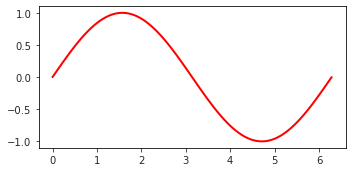

In [10]:
from spectrochempy import *

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
plt.figure(figsize=(5,2.5))
p, = plt.plot(x,y)
p.set_linewidth(2)
p.set_color('red')

## NDDataset, the main object

`NDDataset` is a python object, actually a container, which can represent most of your multidimensional spectroscopic data. A limitation however is that a dataset must contains homogeneous data, with the same units, same coordinates, etc. 

If you need a more complex data structure, where heterogeneous data can be stored, you can use the `NDPanel`  object (see [NDPanel description](https://www.spectrochempy.fr/user/userguide/dataset/2_ndpanel.html)).

As an example of `NDDataset`, in the following we read data from a series of FTIR experiments, provided by the OMNIC software:

In [11]:
nd = NDDataset.read_omnic(os.path.join('irdata', 'NH4Y-activation.SPG'))

Note that for this example, we use data stored in a ``test`` directory. For your own usage, you probably have to give the full pathname (see ... for the way to overcome this using `preferences` setting)

### Display dataset information

Several ways are available to display the data we have jsut read and that are now stored in the dataset 

* **Printing** them, using the print function of python to get a short text version of the dataset information.

In [12]:
print(nd)

NDDataset: [float32] a.u. (shape: (y:55, x:5549))


A much longer (and colored) information text can be obtained using the spectrochempy provided `print_` function.

In [13]:
print_(nd)

         name: NH4Y-activation.SPG
       author: christian@lcs191n.ensicaen.fr
      created: 2019-06-18 18:08:39.313243
  description: Dataset from spg file: NH4Y-activation.SPG
               History of the 1st spectrum: vz0521.spa, Thu Jul 07 06:10:41 2016 (GMT+02:00)
      history: 2019-06-18 18:08:39.303226:read from spg file
               Sorted
          DATA 
        title: Absorbance
       values: ... 
         [[   2.057    2.061 ...    2.013    2.012]
          [   2.033    2.037 ...    1.913    1.911]
          ...
          [   1.794    1.791 ...    1.198    1.198]
          [   1.816    1.815 ...     1.24    1.238]] a.u.
        shape: (y:55, x:5549)
     DIMENSION `x`
         size: 5549
        title: Wavenumbers
  coordinates: [    6000     5999 ...    650.9    649.9] cm^-1
     DIMENSION `y`
         size: 55
        title: Acquisition timestamp (GMT)
  coordinates: [1.468e+09 1.468e+09 ... 1.468e+09 1.468e+09] s
       labels: ... 
         [[  2016-07-06 19:03:14

* **Displaying html**, inside a jupyter notebook, by just typing the name of the dataset (must be the last instruction of a cell, however!)

In [14]:
nd

name,NH4Y-activation.SPG
author,christian@lcs191n.ensicaen.fr
created,2019-06-18 18:08:39.313243
description,"Dataset from spg file: NH4Y-activation.SPG History of the 1st spectrum: vz0521.spa, Thu Jul 07 06:10:41 2016 (GMT+02:00)"
history,2019-06-18 18:08:39.303226:read from spg file Sorted
DATA,
title,Absorbance
values,[[ 2.057 2.061 ... 2.013 2.012] [ 2.033 2.037 ... 1.913 1.911] ... [ 1.794 1.791 ... 1.198 1.198] [ 1.816 1.815 ... 1.24 1.238]] a.u.
shape,"(y:55, x:5549)"
DIMENSION `x`,
size,5549


### Plotting a dataset

Let's plot first a 1D spectrum (for instance one row of nd)

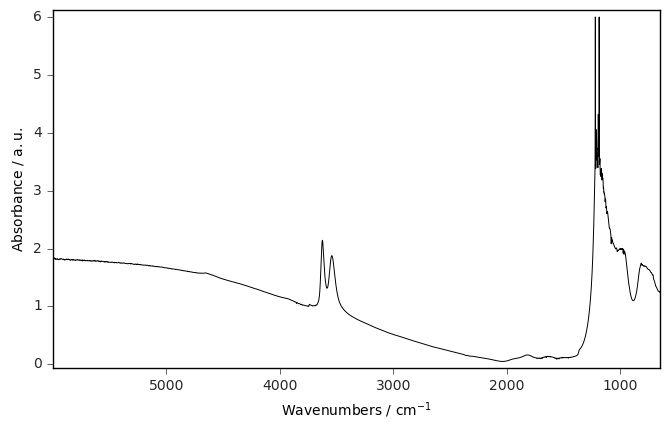

In [15]:
import warnings

row = nd[-1]
_ = row.plot()

or a column ...

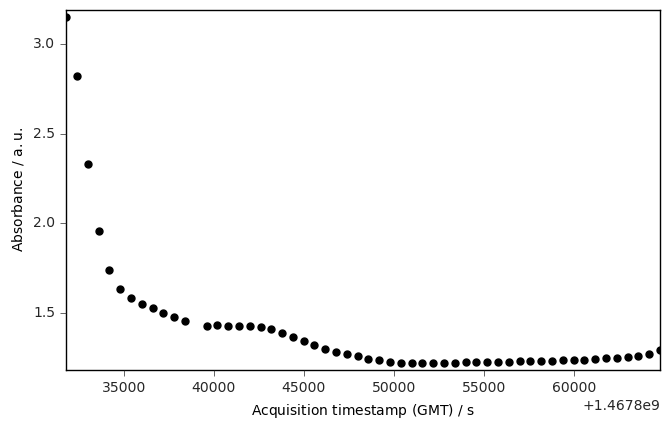

In [16]:
col = nd[:, 3500.]  # note the indexing using wavenumber!
_ = col.plot_scatter()

2D plots can be also generated as stacked plot

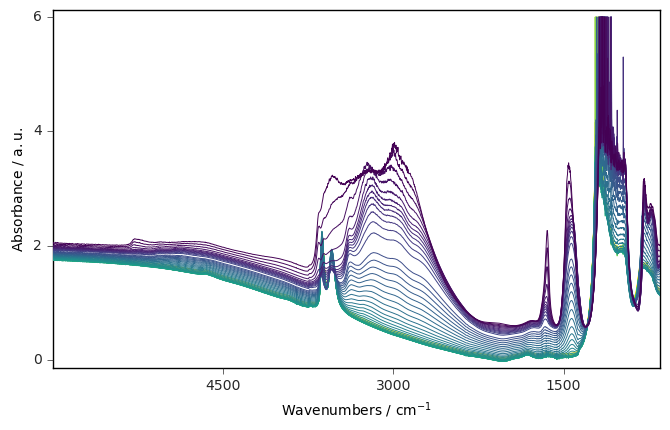

In [17]:
_ = nd.plot(method='stack') # or nd.plot_stack()

or as a contour plot: 

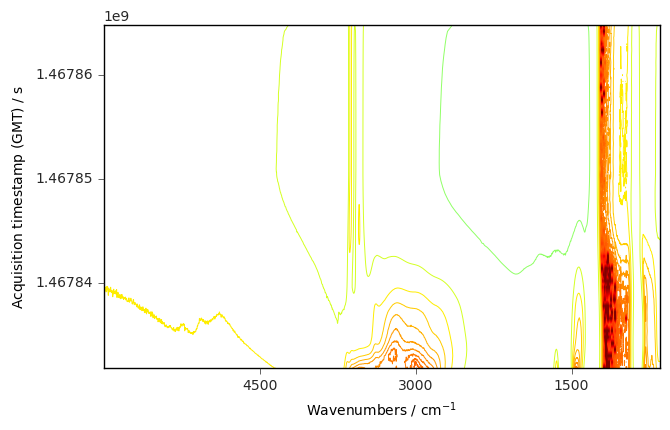

In [18]:
_ = nd.plot(method='map') # or nd.plot_map()

Note that as we plot wavenumbers as abcissa, by convention the coordinates direction is reversed.

This can be changed by using the keyword argument `reversed = False`.

### Processing a dataset

Some arithmetic can be performed on such dataset. Here is an example where we subtract one reference spectrum to the whole nddataset that we have read above (`nd`).

Lets take, e.g., the last row as reference

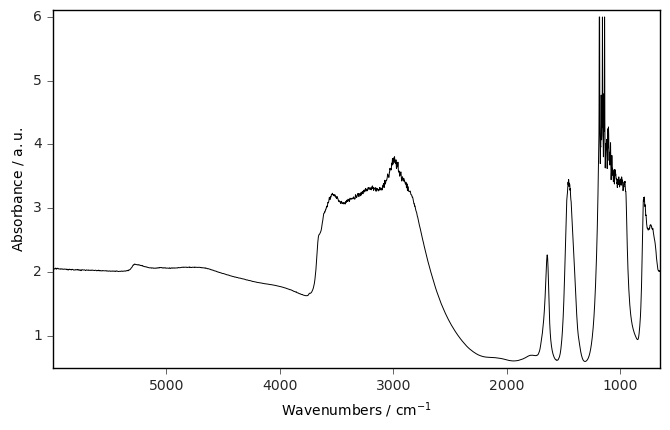

In [19]:
ref = nd[0]
_ = ref.plot() 

Now suppress this ref spectrum to all other spectra of the whole dataset

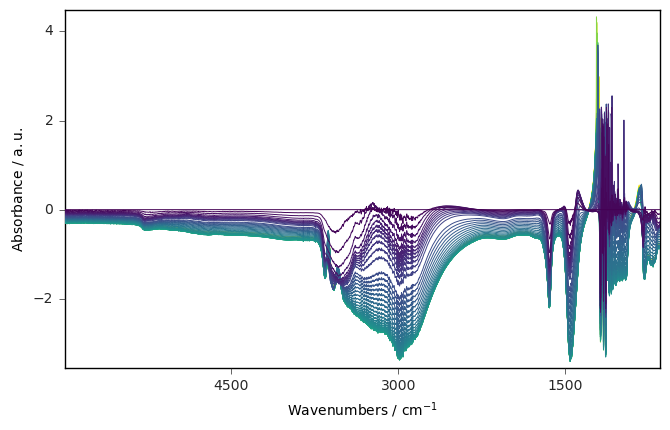

In [20]:
nds = nd - ref  
_ = nds.plot(method='stack')

More details on available on available processing and analysis function will be given later in this user guide.
